# Basic Tensor Operations



In [ ]:
from __future__ import print_function
import tensorflow as tf

In [ ]:
# Define tensor constants.
a = tf.constant(2)
b = tf.constant(3)
c = tf.constant(5)

In [ ]:
# Various tensor operations.
# Note: Tensors also support python operators (+, *, ...)
add = tf.add(a, b)
sub = tf.subtract(a, b)
mul = tf.multiply(a, b)
div = tf.divide(a, b)

# Access tensors value.
print("add =", add.numpy())
print("sub =", sub.numpy())
print("mul =", mul.numpy())
print("div =", div.numpy())

add = 5
sub = -1
mul = 6
div = 0.6666666666666666


In [ ]:
# Some more operations.
mean = tf.reduce_mean([a, b, c])
sum = tf.reduce_sum([a, b, c])

# Access tensors value.
print("mean =", mean.numpy())
print("sum =", sum.numpy())

mean = 3
sum = 10


In [ ]:
# Matrix multiplications.
matrix1 = tf.constant([[1., 2.], [3., 4.]])
matrix2 = tf.constant([[5., 6.], [7., 8.]])

product = tf.matmul(matrix1, matrix2)

In [ ]:
# Display Tensor.
product

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[19., 22.],
       [43., 50.]], dtype=float32)>

In [ ]:
# Convert Tensor to Numpy.
product.numpy()

array([[19., 22.],
       [43., 50.]], dtype=float32)

#Linear Regression


In [ ]:
import tensorflow as tf
import numpy as np


In [ ]:
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [ ]:
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [ ]:
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [ ]:
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [ ]:
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.310011, W: 0.410051, b: -0.324300
step: 100, loss: 0.276317, W: 0.391923, b: -0.195776
step: 150, loss: 0.249893, W: 0.375869, b: -0.081961
step: 200, loss: 0.229171, W: 0.361652, b: 0.018830
step: 250, loss: 0.212920, W: 0.349062, b: 0.108087
step: 300, loss: 0.200176, W: 0.337913, b: 0.187129
step: 350, loss: 0.190181, W: 0.328040, b: 0.257126
step: 400, loss: 0.182344, W: 0.319296, b: 0.319113
step: 450, loss: 0.176197, W: 0.311553, b: 0.374007
step: 500, loss: 0.171377, W: 0.304697, b: 0.422619
step: 550, loss: 0.167597, W: 0.298624, b: 0.465667
step: 600, loss: 0.164632, W: 0.293247, b: 0.503790
step: 650, loss: 0.162307, W: 0.288485, b: 0.537550
step: 700, loss: 0.160484, W: 0.284268, b: 0.567446
step: 750, loss: 0.159054, W: 0.280534, b: 0.593922
step: 800, loss: 0.157933, W: 0.277227, b: 0.617368
step: 850, loss: 0.157054, W: 0.274298, b: 0.638130
step: 900, loss: 0.156364, W: 0.271705, b: 0.656517
step: 950, loss: 0.155823, W: 0.269408, b: 0.672799
step: 1000

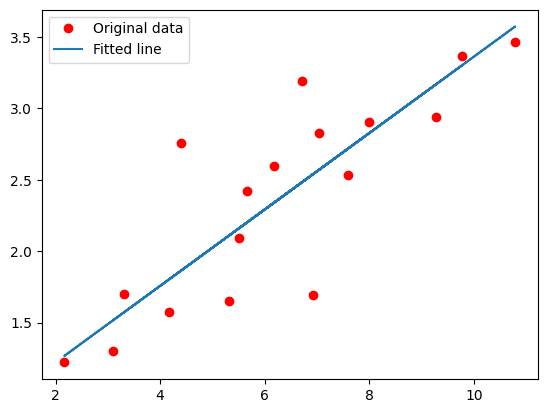

In [ ]:
import matplotlib.pyplot as plt
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()

#logistic regression


In [ ]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import numpy as np

In [ ]:
num_classes = 10 # 0 to 9 digits
num_features = 784 # 28*28

# Training parameters.
learning_rate = 0.01
training_steps = 1000
batch_size = 256
display_step = 50

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Convert to float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Flatten images to 1-D vector of 784 features (28*28).
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Use tf.data API to shuffle and batch data.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [ ]:
# Weight of shape [784, 10], the 28*28 image features, and total number of classes.
W = tf.Variable(tf.ones([num_features, num_classes]), name="weight")
# Bias of shape [10], the total number of classes.
b = tf.Variable(tf.zeros([num_classes]), name="bias")

# Logistic regression (Wx + b).
def logistic_regression(x):
    # Apply softmax to normalize the logits to a probability distribution.
    return tf.nn.softmax(tf.matmul(x, W) + b)

# Cross-Entropy loss function.
def cross_entropy(y_pred, y_true):
    # Encode label to a one hot vector.
    y_true = tf.one_hot(y_true, depth=num_classes)
    # Clip prediction values to avoid log(0) error.
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    # Compute cross-entropy.
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred),1))

# Accuracy metric.
def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [ ]:
def run_optimization(x, y):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = logistic_regression(x)
        loss = cross_entropy(pred, y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [ ]:
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    # Run the optimization to update W and b values.
    run_optimization(batch_x, batch_y)
    
    if step % display_step == 0:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

step: 50, loss: 1.869604, accuracy: 0.699219
step: 100, loss: 1.529156, accuracy: 0.761719
step: 150, loss: 1.329894, accuracy: 0.808594
step: 200, loss: 1.219620, accuracy: 0.808594
step: 250, loss: 1.040559, accuracy: 0.839844
step: 300, loss: 1.043610, accuracy: 0.800781
step: 350, loss: 0.936782, accuracy: 0.816406
step: 400, loss: 0.848316, accuracy: 0.851562
step: 450, loss: 0.738437, accuracy: 0.894531
step: 500, loss: 0.856492, accuracy: 0.777344
step: 550, loss: 0.811736, accuracy: 0.820312
step: 600, loss: 0.798123, accuracy: 0.839844
step: 650, loss: 0.773814, accuracy: 0.804688
step: 700, loss: 0.666742, accuracy: 0.875000
step: 750, loss: 0.657093, accuracy: 0.843750
step: 800, loss: 0.674162, accuracy: 0.839844
step: 850, loss: 0.693837, accuracy: 0.859375
step: 900, loss: 0.639338, accuracy: 0.835938
step: 950, loss: 0.600501, accuracy: 0.882812
step: 1000, loss: 0.677740, accuracy: 0.867188


In [ ]:
pred = logistic_regression(x_test)
print("Test Accuracy: %f" % accuracy(pred, y_test))

Test Accuracy: 0.870600


In [ ]:
import matplotlib.pyplot as plt

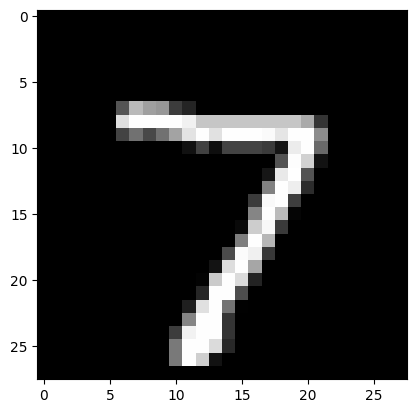

Model prediction: 7


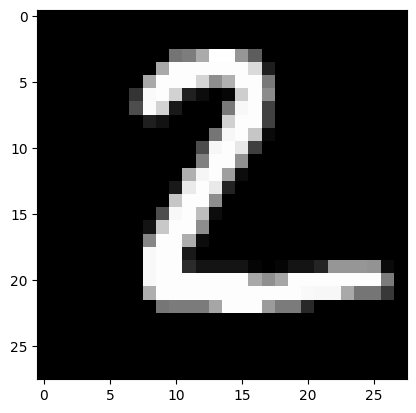

Model prediction: 2


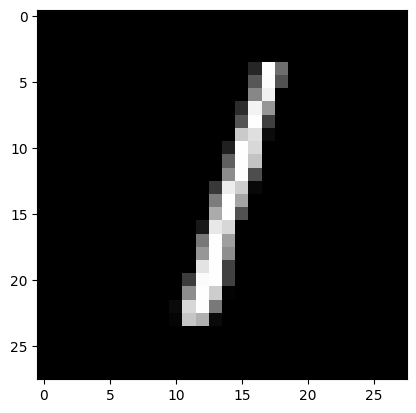

Model prediction: 1


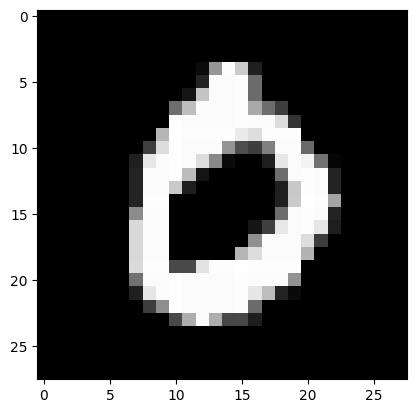

Model prediction: 0


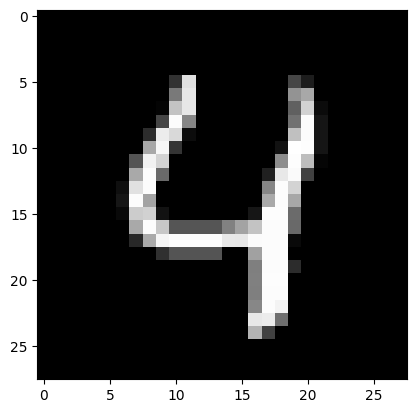

Model prediction: 4


In [ ]:
n_images = 5
test_images = x_test[:n_images]
predictions = logistic_regression(test_images)

# Display image and model prediction.
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))